In [74]:
import pandas as pd
import numpy as np
import os

In [75]:
os.chdir('C:\\Users\\skv\\Downloads\\drive-download-20210428T114902Z-001-1\drive-download-20210428T114902Z-001')

In [76]:
df=pd.read_csv('df.csv')

In [77]:
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
0,73557,8,2,1,69,NaN,4,4,1,NaN,...,6.586219,-6.527018,9.182882,-9.018023,-6.181923,5.151193,-9.708139,2.814690,-2.712184,-6.811191
1,73558,8,2,1,54,NaN,3,3,1,NaN,...,-9.588554,1.863741,-9.378731,8.289190,-2.561066,-3.755943,1.406037,7.590942,0.480820,-4.636475
2,73559,8,2,1,72,NaN,3,3,2,NaN,...,-5.229054,6.379788,-9.433054,-9.285869,9.248429,-7.439368,8.374918,8.401561,-9.936335,0.913262
3,73560,8,2,1,9,NaN,3,3,1,119.0,...,7.428271,-1.193575,6.972074,-0.257756,-5.087773,8.581422,4.767615,9.760521,-4.708915,7.624684
4,73561,8,2,2,73,NaN,3,3,1,NaN,...,2.125105,-2.906226,1.977286,-1.322955,-1.034636,6.702919,-1.735375,-4.799543,1.194572,-7.098007


In [78]:
df.fillna(0,inplace=True)

In [79]:
df2=df[list(df.columns[1:])]

In [80]:
uselessCols=[]
def checkForCategoricalVarsWhichIsNotGivingRelavantInfo(df):
    for item in df.columns:
        if(len(df[item].value_counts())==1):
            uselessCols.append(item)
            print(df[item].value_counts())
            print()

In [81]:
checkForCategoricalVarsWhichIsNotGivingRelavantInfo(df2)

8    9813
Name: SDDSRVYR, dtype: int64

2    9813
Name: RIDSTATR, dtype: int64

0.0    9813
Name: DRQSDT5, dtype: int64

0.0    9813
Name: URDP02LC, dtype: int64

0.0    9813
Name: LBDBPBLC, dtype: int64

0.0    9813
Name: LBDBSELC, dtype: int64

0.0    9813
Name: LBDBMNLC, dtype: int64

0.0    9813
Name: URDUCSLC, dtype: int64

0.0    9813
Name: URDUMOLC, dtype: int64



In [82]:
df2.drop(columns=uselessCols,inplace=True)

C:\Users\skv\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [83]:
df2.head()

,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
0,1,69,0.0,4,4,1,0.0,1.0,1.0,1,...,6.586219,-6.527018,9.182882,-9.018023,-6.181923,5.151193,-9.708139,2.814690,-2.712184,-6.811191
1,1,54,0.0,3,3,1,0.0,2.0,0.0,1,...,-9.588554,1.863741,-9.378731,8.289190,-2.561066,-3.755943,1.406037,7.590942,0.480820,-4.636475
2,1,72,0.0,3,3,2,0.0,1.0,1.0,1,...,-5.229054,6.379788,-9.433054,-9.285869,9.248429,-7.439368,8.374918,8.401561,-9.936335,0.913262
3,1,9,0.0,3,3,1,119.0,0.0,0.0,1,...,7.428271,-1.193575,6.972074,-0.257756,-5.087773,8.581422,4.767615,9.760521,-4.708915,7.624684
4,2,73,0.0,3,3,1,0.0,2.0,0.0,1,...,2.125105,-2.906226,1.977286,-1.322955,-1.034636,6.702919,-1.735375,-4.799543,1.194572,-7.098007


In [84]:
categoricalColumns=[]
def checkForCategoricalVarsWhichIsNotGivingRelavantInfo(df):
    for item in df.columns:
        if(len(df[item].value_counts())==2):
            categoricalColumns.append(item)

In [85]:
checkForCategoricalVarsWhichIsNotGivingRelavantInfo(df2)

In [86]:
df2[categoricalColumns]=df2[categoricalColumns].astype(object)

C:\Users\skv\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [87]:
df2_cat=df2.select_dtypes(include=[np.object])

In [88]:
df2_cat.head()

,RIAGENDR,RIDEXMON,SIALANG,SIAINTRP,DMDHRGND,SDMVPSU,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,...,URDUCDLC,URDUCOLC,URDUMNLC,URDUPBLC,URDUSBLC,URDUSNLC,URDUSRLC,URDUTLLC,URDUTULC,URDUURLC
0,1,1,1,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,1,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,2,1,2,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,2,1,1,2,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df2._get_numeric_data().head()

,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
0,69,0.0,4,4,0.0,1.0,1.0,1,1.0,0.0,...,6.586219,-6.527018,9.182882,-9.018023,-6.181923,5.151193,-9.708139,2.814690,-2.712184,-6.811191
1,54,0.0,3,3,0.0,2.0,0.0,1,1.0,0.0,...,-9.588554,1.863741,-9.378731,8.289190,-2.561066,-3.755943,1.406037,7.590942,0.480820,-4.636475
2,72,0.0,3,3,0.0,1.0,1.0,1,1.0,0.0,...,-5.229054,6.379788,-9.433054,-9.285869,9.248429,-7.439368,8.374918,8.401561,-9.936335,0.913262
3,9,0.0,3,3,119.0,0.0,0.0,1,1.0,0.0,...,7.428271,-1.193575,6.972074,-0.257756,-5.087773,8.581422,4.767615,9.760521,-4.708915,7.624684
4,73,0.0,3,3,0.0,2.0,0.0,1,1.0,0.0,...,2.125105,-2.906226,1.977286,-1.322955,-1.034636,6.702919,-1.735375,-4.799543,1.194572,-7.098007


In [90]:
dummy_var_df2=pd.get_dummies(data=df2_cat,drop_first=True)

In [91]:
df2.drop(columns=df2_cat.columns,axis=1,inplace=True)

C:\Users\skv\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [92]:
newdf=pd.concat([df2,dummy_var_df2],axis=1)

In [93]:
newdf.shape

(9813, 626)

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
sc=StandardScaler()

In [96]:
sc_data=sc.fit_transform(newdf)

In [97]:
sc_df=pd.DataFrame(sc_data,columns=newdf.columns)

In [98]:
sc_df.head()

,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,...,URDUCDLC_1.0,URDUCOLC_1.0,URDUMNLC_1.0,URDUPBLC_1.0,URDUSBLC_1.0,URDUSNLC_1.0,URDUSRLC_1.0,URDUTLLC_1.0,URDUTULC_1.0,URDUURLC_1.0
0,1.531807,-0.218113,0.725587,0.449104,-0.657859,-0.191701,2.547002,-0.139098,-0.285271,-0.198509,...,-0.227527,-0.014278,-0.482322,-0.053493,-0.25497,-0.162349,-0.010095,-0.04631,-0.214594,-0.224789
1,0.916959,-0.218113,-0.066337,-0.172835,-0.657859,0.852810,-0.219321,-0.139098,-0.285271,-0.198509,...,-0.227527,-0.014278,-0.482322,-0.053493,-0.25497,-0.162349,-0.010095,-0.04631,-0.214594,-0.224789
2,1.654776,-0.218113,-0.066337,-0.172835,-0.657859,-0.191701,2.547002,-0.139098,-0.285271,-0.198509,...,-0.227527,-0.014278,-0.482322,-0.053493,-0.25497,-0.162349,-0.010095,-0.04631,-0.214594,-0.224789
3,-0.927582,-0.218113,-0.066337,-0.172835,1.038698,-1.236213,-0.219321,-0.139098,-0.285271,-0.198509,...,4.395085,-0.014278,2.073306,-0.053493,-0.25497,-0.162349,-0.010095,-0.04631,-0.214594,-0.224789
4,1.695766,-0.218113,-0.066337,-0.172835,-0.657859,0.852810,-0.219321,-0.139098,-0.285271,-0.198509,...,-0.227527,-0.014278,-0.482322,-0.053493,-0.25497,-0.162349,-0.010095,-0.04631,-0.214594,-0.224789


In [99]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
n_clusters = [2, 3, 4, 5, 6]
silscore=[]
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(sc_df)
    score = silhouette_score(sc_df, predict, random_state= 10)
    silscore.append(score)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.14911103024158423)
For 3 clusters the silhouette score is 0.1813552330540448)
For 4 clusters the silhouette score is 0.14814667380348992)
For 5 clusters the silhouette score is 0.11232819123350542)
For 6 clusters the silhouette score is 0.11780354286578018)


not good score 

In [100]:
silscore

[0.14911103024158423,
 0.1813552330540448,
 0.14814667380348992,
 0.11232819123350542,
 0.11780354286578018]

In [101]:
import seaborn as sns

<AxesSubplot:>

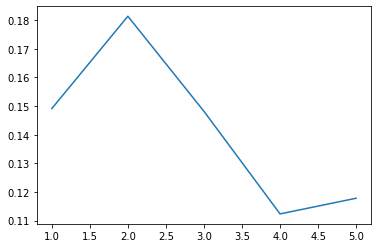

In [102]:
sns.lineplot(x=[1,2,3,4,5],y=silscore)

In [103]:
sc_df.shape

(9813, 626)

In [104]:
sc_df.head()

,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,...,URDUCDLC_1.0,URDUCOLC_1.0,URDUMNLC_1.0,URDUPBLC_1.0,URDUSBLC_1.0,URDUSNLC_1.0,URDUSRLC_1.0,URDUTLLC_1.0,URDUTULC_1.0,URDUURLC_1.0
0,1.531807,-0.218113,0.725587,0.449104,-0.657859,-0.191701,2.547002,-0.139098,-0.285271,-0.198509,...,-0.227527,-0.014278,-0.482322,-0.053493,-0.25497,-0.162349,-0.010095,-0.04631,-0.214594,-0.224789
1,0.916959,-0.218113,-0.066337,-0.172835,-0.657859,0.852810,-0.219321,-0.139098,-0.285271,-0.198509,...,-0.227527,-0.014278,-0.482322,-0.053493,-0.25497,-0.162349,-0.010095,-0.04631,-0.214594,-0.224789
2,1.654776,-0.218113,-0.066337,-0.172835,-0.657859,-0.191701,2.547002,-0.139098,-0.285271,-0.198509,...,-0.227527,-0.014278,-0.482322,-0.053493,-0.25497,-0.162349,-0.010095,-0.04631,-0.214594,-0.224789
3,-0.927582,-0.218113,-0.066337,-0.172835,1.038698,-1.236213,-0.219321,-0.139098,-0.285271,-0.198509,...,4.395085,-0.014278,2.073306,-0.053493,-0.25497,-0.162349,-0.010095,-0.04631,-0.214594,-0.224789
4,1.695766,-0.218113,-0.066337,-0.172835,-0.657859,0.852810,-0.219321,-0.139098,-0.285271,-0.198509,...,-0.227527,-0.014278,-0.482322,-0.053493,-0.25497,-0.162349,-0.010095,-0.04631,-0.214594,-0.224789


now lets apply PCA on the data

In [105]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = sc_df.shape[1])
pca_data = pca.fit_transform(sc_df)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.95:
        break
    itr=itr+1
print('The number of principle components capturing 95 percent variation in data is : ',itr,' Variance explained is ', cum_var)

The number of principle components capturing 95 percent variation in data is :  240  Variance explained is  0.9506856366980323


In [64]:
itr

240

In [65]:
pca = PCA(n_components=240)

In [66]:
pca_data=pca.fit_transform(sc_df)

In [70]:
pcadf=pd.DataFrame(pca_data)

In [71]:
n_clusters = [2, 3, 4, 5, 6]
silscore=[]
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(pcadf)
    score = silhouette_score(pcadf, predict, random_state= 10)
    silscore.append(score)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.15631306219120186)
For 3 clusters the silhouette score is 0.18971727898942886)
For 4 clusters the silhouette score is 0.15696249828173162)
For 5 clusters the silhouette score is 0.12287209846840652)
For 6 clusters the silhouette score is 0.127690424424369)


which is still not a good score 

so lets apply the same with hirachial clustering 

In [107]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2, 3, 4, 5, 6]
silscore=[]
for K in n_clusters:
    cluster = AgglomerativeClustering (n_clusters= K)
    predict = cluster.fit_predict(pcadf)
    score = silhouette_score(pcadf, predict, random_state= 10)
    silscore.append(score)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.11068498417143338)
For 3 clusters the silhouette score is 0.1353081687920648)
For 4 clusters the silhouette score is 0.1544235599823816)
For 5 clusters the silhouette score is 0.1047362348480143)
For 6 clusters the silhouette score is 0.10751391587936872)


Still not getting good score 

In [209]:
df1=pd.read_csv('df.csv')

In [210]:
df1.fillna(df1.mean(),inplace=True)

In [211]:
df3=df1[list(df1.columns[1:])]

In [212]:
df3.head()

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
0,8,2,1,69,10.258567,4,4,1,107.478519,1.000000,...,6.586219,-6.527018,9.182882,-9.018023,-6.181923,5.151193,-9.708139,2.814690,-2.712184,-6.811191
1,8,2,1,54,10.258567,3,3,1,107.478519,2.000000,...,-9.588554,1.863741,-9.378731,8.289190,-2.561066,-3.755943,1.406037,7.590942,0.480820,-4.636475
2,8,2,1,72,10.258567,3,3,2,107.478519,1.000000,...,-5.229054,6.379788,-9.433054,-9.285869,9.248429,-7.439368,8.374918,8.401561,-9.936335,0.913262
3,8,2,1,9,10.258567,3,3,1,119.000000,1.914606,...,7.428271,-1.193575,6.972074,-0.257756,-5.087773,8.581422,4.767615,9.760521,-4.708915,7.624684
4,8,2,2,73,10.258567,3,3,1,107.478519,2.000000,...,2.125105,-2.906226,1.977286,-1.322955,-1.034636,6.702919,-1.735375,-4.799543,1.194572,-7.098007


In [213]:
checkForCategoricalVarsWhichIsNotGivingRelavantInfo(df3)

In [214]:
df3.drop(columns=uselessCols,inplace=True)

C:\Users\skv\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [215]:
checkForCategoricalVarsWhichIsNotGivingRelavantInfo(df3)
df3[categoricalColumns]=df3[categoricalColumns].astype(object)
df3_cat=df3.select_dtypes(include=[np.object])
dummy_var_df3=pd.get_dummies(data=df3_cat,drop_first=True)
df3.drop(columns=df3_cat.columns,axis=1,inplace=True)
newdf=pd.concat([df3,dummy_var_df3],axis=1)

C:\Users\skv\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [216]:
sc_data=sc.fit_transform(newdf)

In [217]:
sc_df=pd.DataFrame(sc_data,columns=newdf.columns)

In [218]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = sc_df.shape[1],random_state=10)
pca_data = pca.fit_transform(sc_df)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.95:
        break
    itr=itr+1
print('The number of principle components capturing 95 percent variation in data is : ',itr,' Variance explained is ', cum_var)

The number of principle components capturing 95 percent variation in data is :  328  Variance explained is  0.9502368899667969


In [219]:
pca = PCA(n_components=328)
pca_data=pca.fit_transform(sc_df)
pcadf=pd.DataFrame(pca_data)

In [220]:
n_clusters = [2, 3, 4, 5, 6]
silscore=[]
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(pcadf)
    score = silhouette_score(pcadf, predict, random_state= 10)
    silscore.append(score)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.07771556587067323)
For 3 clusters the silhouette score is 0.11454722485022842)
For 4 clusters the silhouette score is 0.07990858538216834)
For 5 clusters the silhouette score is 0.04187063921323319)
For 6 clusters the silhouette score is 0.06461511181955633)


In [221]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2, 3, 4, 5, 6]
silscore=[]
for K in n_clusters:
    cluster = AgglomerativeClustering (n_clusters= K)
    predict = cluster.fit_predict(pcadf)
    score = silhouette_score(pcadf, predict, random_state= 10)
    silscore.append(score)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.30628457163714873)
For 3 clusters the silhouette score is 0.10178095931286854)
For 4 clusters the silhouette score is 0.09340554843720023)
For 5 clusters the silhouette score is 0.03802697189643252)
For 6 clusters the silhouette score is 0.05027027227165554)


In [222]:
pca_data.shape

(9813, 328)

now lets replace median

In [242]:
df1=pd.read_csv('df.csv')

In [243]:
df1.fillna(df1.median(),inplace=True)

In [244]:
df_median=df1[list(df1.columns[1:])]

In [245]:
checkForCategoricalVarsWhichIsNotGivingRelavantInfo(df_median)

In [246]:
df_median.drop(columns=uselessCols,inplace=True)

C:\Users\skv\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [247]:
checkForCategoricalVarsWhichIsNotGivingRelavantInfo(df_median)
df_median[categoricalColumns]=df_median[categoricalColumns].astype(object)
df_median_cat=df_median.select_dtypes(include=[np.object])
dummy_var_df_median=pd.get_dummies(data=df_median_cat,drop_first=True)
df_median.drop(columns=df_median_cat.columns,axis=1,inplace=True)
newdf=pd.concat([df_median,dummy_var_df3],axis=1)

C:\Users\skv\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [248]:
sc_data=sc.fit_transform(newdf)
sc_df=pd.DataFrame(sc_data,columns=newdf.columns)

from sklearn.decomposition import PCA 
pca = PCA(n_components = sc_df.shape[1])
pca_data = pca.fit_transform(sc_df)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.95:
        break
    itr=itr+1
print('The number of principle components capturing 95 percent variation in data is : ',itr,' Variance explained is ', cum_var)

The number of principle components capturing 95 percent variation in data is :  325  Variance explained is  0.9503504255615741


In [249]:
pca = PCA(n_components=308)
pca_data=pca.fit_transform(sc_df)
pcadf=pd.DataFrame(pca_data)

In [207]:
n_clusters = [2, 3, 4, 5, 6]
silscore=[]
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(pcadf)
    score = silhouette_score(pcadf, predict, random_state= 10)
    silscore.append(score)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.07924374878804641)
For 3 clusters the silhouette score is 0.07306248450204349)
For 4 clusters the silhouette score is 0.07732560266995735)
For 5 clusters the silhouette score is 0.046503039636793274)
For 6 clusters the silhouette score is 0.054216285468674234)


In [250]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2, 3, 4, 5, 6]
silscore=[]
for K in n_clusters:
    cluster = AgglomerativeClustering (n_clusters= K)
    predict = cluster.fit_predict(pcadf)
    score = silhouette_score(pcadf, predict, random_state= 10)
    silscore.append(score)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.31555720826040157)
For 3 clusters the silhouette score is 0.10515813912579783)
For 4 clusters the silhouette score is 0.09627897738850538)
For 5 clusters the silhouette score is 0.03447373715603147)
For 6 clusters the silhouette score is 0.047549032244996806)


In [251]:

ac2=AgglomerativeClustering(n_clusters=2)



In [256]:
cluster=ac2.fit_predict(pcadf)

In [285]:
finalDF=df['SEQN']

In [286]:
cluster

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [287]:
finalDF.head()

0    73557
1    73558
2    73559
3    73560
4    73561
Name: SEQN, dtype: int64

In [288]:
clusterdf=pd.DataFrame(cluster.tolist(),columns=['Cluster'])

In [289]:
fina=pd.concat([finalDF,clusterdf],axis=1)

In [290]:
fina.head()

,SEQN,Cluster
0,73557,0
1,73558,0
2,73559,0
3,73560,0
4,73561,0


In [291]:

import matplotlib.pyplot as plt

In [294]:
fina.to_csv('AmitNayak_1.csv',index=False)